In [1]:
import scanpy as sc
from anndata import AnnData
import numpy as np
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep
import pandas as pd

20230111-083126.563 12182 INFO root:17 local study files stored in: /home/mahmoud_ibrahim/code/cellenium/scratch


In [2]:
url = "https://covid19.cog.sanger.ac.uk/vieira19_Alveoli_and_parenchyma_anonymised.processed.h5ad"
adata = prep.get_h5ad_from_url(url, "lung_asthma")

In [3]:
prep.jupyter_h5ad_overview(adata)

,Sample,Donor,Source,Location,CellType,BroadCellType,n_genes
index,,,,,,,
LungTranscriptome7239220_LungTranscriptome7239220ACGGAGATCAAGGTAA-0,LungTranscriptome7239220_LungTranscriptome7239220,298C,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,3591
LungTranscriptome7135919_GGCGTGTCATACCATG-0,LungTranscriptome7135919,290B,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,2421
LungTranscriptome7135920_GCGACCATCAGTTAGC-0,LungTranscriptome7135920,290B,Transplant,Alveoli and parenchyma,Basal 2,Basal,1575
LungTranscriptome7239219_LungTranscriptome7239219CATTCGCAGCCGCCTA-0,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,2223
LungTranscriptome7135920_TCAACGAGTATCTGCA-0,LungTranscriptome7135920,290B,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,2037
...,...,...,...,...,...,...,...
LungTranscriptome7239219_LungTranscriptome7239219GGGCATCCACCAACCG-1,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Mast cells,Mast cells,1178
LungTranscriptome7239219_LungTranscriptome7239219TGCTGCTAGCAATCTC-1,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Mast cells,Mast cells,1919
LungTranscriptome7239213_GACTGCGTCCTGCCAT-1,LungTranscriptome7239213,292B,Transplant,Alveoli and parenchyma,Mast cells,Mast cells,4401


,highly_variable,means,dispersions,dispersions_norm,n_cells
index,,,,,
RP11-34P13.7,False,0.004337,1.440831,0.512841,18
FO538757.2,False,0.473574,1.297462,0.357271,2357
AP006222.2,False,0.343604,1.146231,-0.708055,1841
RP4-669L17.10,False,0.011301,1.482129,0.685565,41
RP5-857K21.4,False,0.001891,1.522884,0.856022,7
...,...,...,...,...,...
AC007325.2,False,0.030610,1.099211,-0.915957,161
AL354822.1,False,0.010744,1.234672,-0.349402,50
AC004556.1,True,0.039421,1.465879,0.617602,146


(12971, 22312)

<12971x22312 sparse matrix of type '<class 'numpy.float32'>'
	with 29598864 stored elements in Compressed Sparse Column format>

OverloadedDict, wrapping:
	{'CellType_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5'],
      dtype=object), 'cellenium': {'differentially_expressed_genes':       names     scores  logfoldchanges     pvals  pvals_adj  \
0      CSTB  77.817535        1.412415  0.000000   0.000000   
1      CTSD  76.475533        1.784404  0.000000   0.000000   
2     GPNMB  76.200821        3.385508  0.000000   0.000000   
3     APOC1  73.483475        2.969045  0.000000   0.000000   
4      ACP5  71.897850        2.952302  0.000000   0.000000   
...     ...        ...             ...       ...        ...   
3224  BAZ1A   2.316792        1.691065  0.020515   0.999121   
3225   CDK9   2.311717        2.722002  0.020793   0.999121   
3226   LDHB   2.307086        0.869298  0.021050   0.999121   
3227   KRT5   2.306997       11.30

/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_hm']['connectivities'] that happens to be dimensioned at n_obs×n_obs (12971×12971).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
/home/mahmoud_ibrahim/.local/lib/python3.8/site-packages/anndata/compat/__init__.py:263: FutureWarning: During AnnData slicing, found matrix at .uns['neighbors_hm']['distances'] that happens to be dimensioned at n_obs×n_obs (12971×12971).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  warn(
20230111-083138.372 12182 INFO root:118 make_norm_expression: no transformations necessary


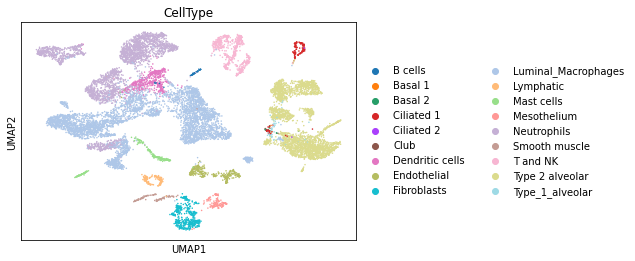

In [4]:
prep.remove_raw_and_layers(adata)
prep.make_sparse(adata)
prep.filter_outliers(adata)
prep.make_norm_expression(adata)

prep.add_umap(adata)
sc.pl.umap(adata, color='CellType')

In [5]:
prep.calculate_differentially_expressed_genes(adata, ['CellType','BroadCellType'])

diff.exp. genes: 100%|██████████| 2/2 [00:59<00:00, 29.66s/it]
20230111-083238.142 12182 INFO root:278 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['CellType', 'BroadCellType']


,names,scores,logfoldchanges,pvals,pvals_adj,ref_attr_value,cmp_attr_value,attribute_name
0,CSTB,77.817535,1.412415,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
1,CTSD,76.475533,1.784404,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
2,GPNMB,76.200821,3.385508,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
3,APOC1,73.483475,2.969045,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
4,ACP5,71.897850,2.952302,0.000000,0.000000,Luminal_Macrophages,_OTHERS_,CellType
...,...,...,...,...,...,...,...,...
3224,BAZ1A,2.316792,1.691065,0.020515,0.999121,Basal,_OTHERS_,BroadCellType
3225,CDK9,2.311717,2.722002,0.020793,0.999121,Basal,_OTHERS_,BroadCellType
3226,LDHB,2.307086,0.869298,0.021050,0.999121,Basal,_OTHERS_,BroadCellType
3227,KRT5,2.306997,11.309298,0.021055,0.999121,Basal,_OTHERS_,BroadCellType


# final h5ad file

In [6]:
prep.set_cellenium_metadata(
    adata,
    title='A cellular census of human lungs identifies novel cell states in health and in asthma',
    description='Here, we use single-cell transcriptomics to chart the cellular landscape of upper and lower airways and lung parenchyma in healthy lungs, and lower airways in asthmatic lungs.',
    taxonomy_id=9606,
    ncit_tissue_ids=['C12468', 'C33839'],
    mesh_disease_ids=['D001249'],
    X_pseudolayer_name='norm_log_expression',
    main_sample_attributes=['CellType','BroadCellType']
)   

In [7]:
adata.write(prep.basedir.joinpath("lung_asthma.h5ad"))
prep.jupyter_h5ad_overview(adata)

,Sample,Donor,Source,Location,CellType,BroadCellType,n_genes
index,,,,,,,
LungTranscriptome7239220_LungTranscriptome7239220ACGGAGATCAAGGTAA-0,LungTranscriptome7239220_LungTranscriptome7239220,298C,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,3590
LungTranscriptome7135919_GGCGTGTCATACCATG-0,LungTranscriptome7135919,290B,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,2419
LungTranscriptome7135920_GCGACCATCAGTTAGC-0,LungTranscriptome7135920,290B,Transplant,Alveoli and parenchyma,Basal 2,Basal,1574
LungTranscriptome7239219_LungTranscriptome7239219CATTCGCAGCCGCCTA-0,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,2223
LungTranscriptome7135920_TCAACGAGTATCTGCA-0,LungTranscriptome7135920,290B,Transplant,Alveoli and parenchyma,Ciliated 1,Ciliated,2037
...,...,...,...,...,...,...,...
LungTranscriptome7239219_LungTranscriptome7239219GGGCATCCACCAACCG-1,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Mast cells,Mast cells,1178
LungTranscriptome7239219_LungTranscriptome7239219TGCTGCTAGCAATCTC-1,LungTranscriptome7239219_LungTranscriptome7239219,298C,Transplant,Alveoli and parenchyma,Mast cells,Mast cells,1919
LungTranscriptome7239213_GACTGCGTCCTGCCAT-1,LungTranscriptome7239213,292B,Transplant,Alveoli and parenchyma,Mast cells,Mast cells,4400


,highly_variable,means,dispersions,dispersions_norm,n_cells
index,,,,,
RP11-34P13.7,False,0.004337,1.440831,0.512841,18
FO538757.2,False,0.473574,1.297462,0.357271,2357
AP006222.2,False,0.343604,1.146231,-0.708055,1841
RP4-669L17.10,False,0.011301,1.482129,0.685565,41
RP5-857K21.4,False,0.001891,1.522884,0.856022,7
...,...,...,...,...,...
AC007325.2,False,0.030610,1.099211,-0.915957,161
AL354822.1,False,0.010744,1.234672,-0.349402,50
AC004556.1,True,0.039421,1.465879,0.617602,146


(12971, 22312)

<12971x22312 sparse matrix of type '<class 'numpy.float32'>'
	with 29598864 stored elements in Compressed Sparse Column format>

OverloadedDict, wrapping:
	{'CellType_colors': array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5'],
      dtype=object), 'cellenium': {'differentially_expressed_genes':       names     scores  logfoldchanges     pvals  pvals_adj  \
0      CSTB  77.817535        1.412415  0.000000   0.000000   
1      CTSD  76.475533        1.784404  0.000000   0.000000   
2     GPNMB  76.200821        3.385508  0.000000   0.000000   
3     APOC1  73.483475        2.969045  0.000000   0.000000   
4      ACP5  71.897850        2.952302  0.000000   0.000000   
...     ...        ...             ...       ...        ...   
3224  BAZ1A   2.316792        1.691065  0.020515   0.999121   
3225   CDK9   2.311717        2.722002  0.020793   0.999121   
3226   LDHB   2.307086        0.869298  0.021050   0.999121   
3227   KRT5   2.306997       11.30